In [1]:
import os
import random
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

In [2]:
np.random.seed(1)
tf.random.set_seed(2)
# basic paths
train_dir = "./dataset/train"
test_dir = "./dataset/test"
val_dir = "./dataset/validation"

class_names = os.listdir(train_dir)

def get_dir_filenames(base_dir, name):
    dir = os.path.join(base_dir, name)

    return {"dir": dir, "file_names": os.listdir(dir)}


train = {name: get_dir_filenames(train_dir, name) for name in class_names}
val = {name: get_dir_filenames(val_dir, name) for name in class_names}

In [3]:
train_len = sum(map(lambda x: len(x['file_names']), train.values()))
val_len = sum(map(lambda x: len(x['file_names']), val.values()))

print(f"Total training images: {train_len}")
print(f"Total validation images: {val_len}")

Total training images: 42
Total validation images: 8


In [4]:
img_input = layers.Input(shape=(150, 150, 10))

x = layers.Conv2D(16, 3, activation='relu')(img_input)
x = layers.MaxPooling2D(2)(x)

x = layers.Conv2D(32, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)

x = layers.Conv2D(64, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)

# x = layers.Conv2D(64, 3, activation='relu')(x)
# x = layers.MaxPooling2D(2)(x)

x = layers.Flatten()(x)

x = layers.Dense(512, activation='relu')(x)

output = layers.Dense(10, activation='softmax')(x)

model = Model(img_input, output)

model.summary()

model.compile(loss='categorical_crossentropy',
            optimizer=RMSprop(learning_rate=0.001),
            metrics=['acc'])

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 10)]    0         
                                                                 
 conv2d (Conv2D)             (None, 148, 148, 16)      1456      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 64)        18496 

2022-04-01 14:26:53.858749: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2022-04-01 14:26:53.858916: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (arch): /proc/driver/nvidia/version does not exist
2022-04-01 14:26:53.861373: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [5]:
# All images will be rescaled by 1./255
# train_datagen = ImageDataGenerator(
#     rescale=1./255,
#     rotation_range=40,
#     width_shift_range=0.2,
#     height_shift_range=0.2,
#     shear_range=0.2,
#     zoom_range=0.2,
#     horizontal_flip=True,
# )
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        train_dir,  # This is the source directory for training images
        target_size=(150, 150),  # All images will be resized to 150x150
        batch_size=6,
        class_mode='categorical',
        subset='training')


validation_generator = val_datagen.flow_from_directory(
        val_dir,
        target_size=(150, 150),
        batch_size=2,
        class_mode='categorical')

Found 42 images belonging to 3 classes.
Found 8 images belonging to 3 classes.


In [6]:
history = model.fit(
      train_generator,
      # steps_per_epoch=6,
      epochs=20,
      validation_data=validation_generator,
      # validation_steps=2,
      verbose=2)

Epoch 1/20


2022-04-01 14:26:55.773915: W tensorflow/core/framework/op_kernel.cc:1745] OP_REQUIRES failed at conv_ops_fused_impl.h:680 : INVALID_ARGUMENT: input depth must be evenly divisible by filter depth: 3 vs 10


InvalidArgumentError: Graph execution error:

Detected at node 'model/conv2d/Relu' defined at (most recent call last):
    File "/usr/lib/python3.10/runpy.py", line 196, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "/usr/lib/python3.10/runpy.py", line 86, in _run_code
      exec(code, run_globals)
    File "/home/willian/.virtualenvs/ml_lab/lib/python3.10/site-packages/ipykernel_launcher.py", line 16, in <module>
      app.launch_new_instance()
    File "/home/willian/.virtualenvs/ml_lab/lib/python3.10/site-packages/traitlets/config/application.py", line 846, in launch_instance
      app.start()
    File "/home/willian/.virtualenvs/ml_lab/lib/python3.10/site-packages/ipykernel/kernelapp.py", line 677, in start
      self.io_loop.start()
    File "/home/willian/.virtualenvs/ml_lab/lib/python3.10/site-packages/tornado/platform/asyncio.py", line 199, in start
      self.asyncio_loop.run_forever()
    File "/usr/lib/python3.10/asyncio/base_events.py", line 600, in run_forever
      self._run_once()
    File "/usr/lib/python3.10/asyncio/base_events.py", line 1896, in _run_once
      handle._run()
    File "/usr/lib/python3.10/asyncio/events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "/home/willian/.virtualenvs/ml_lab/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 473, in dispatch_queue
      await self.process_one()
    File "/home/willian/.virtualenvs/ml_lab/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 462, in process_one
      await dispatch(*args)
    File "/home/willian/.virtualenvs/ml_lab/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 369, in dispatch_shell
      await result
    File "/home/willian/.virtualenvs/ml_lab/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 664, in execute_request
      reply_content = await reply_content
    File "/home/willian/.virtualenvs/ml_lab/lib/python3.10/site-packages/ipykernel/ipkernel.py", line 355, in do_execute
      res = shell.run_cell(code, store_history=store_history, silent=silent)
    File "/home/willian/.virtualenvs/ml_lab/lib/python3.10/site-packages/ipykernel/zmqshell.py", line 532, in run_cell
      return super().run_cell(*args, **kwargs)
    File "/home/willian/.virtualenvs/ml_lab/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 2854, in run_cell
      result = self._run_cell(
    File "/home/willian/.virtualenvs/ml_lab/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 2900, in _run_cell
      return runner(coro)
    File "/home/willian/.virtualenvs/ml_lab/lib/python3.10/site-packages/IPython/core/async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "/home/willian/.virtualenvs/ml_lab/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3098, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "/home/willian/.virtualenvs/ml_lab/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3301, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "/home/willian/.virtualenvs/ml_lab/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3361, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "/tmp/ipykernel_4542/300984438.py", line 1, in <cell line: 1>
      history = model.fit(
    File "/home/willian/.virtualenvs/ml_lab/lib/python3.10/site-packages/keras/utils/traceback_utils.py", line 64, in error_handler
      return fn(*args, **kwargs)
    File "/home/willian/.virtualenvs/ml_lab/lib/python3.10/site-packages/keras/engine/training.py", line 1384, in fit
      tmp_logs = self.train_function(iterator)
    File "/home/willian/.virtualenvs/ml_lab/lib/python3.10/site-packages/keras/engine/training.py", line 1021, in train_function
      return step_function(self, iterator)
    File "/home/willian/.virtualenvs/ml_lab/lib/python3.10/site-packages/keras/engine/training.py", line 1010, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/home/willian/.virtualenvs/ml_lab/lib/python3.10/site-packages/keras/engine/training.py", line 1000, in run_step
      outputs = model.train_step(data)
    File "/home/willian/.virtualenvs/ml_lab/lib/python3.10/site-packages/keras/engine/training.py", line 859, in train_step
      y_pred = self(x, training=True)
    File "/home/willian/.virtualenvs/ml_lab/lib/python3.10/site-packages/keras/utils/traceback_utils.py", line 64, in error_handler
      return fn(*args, **kwargs)
    File "/home/willian/.virtualenvs/ml_lab/lib/python3.10/site-packages/keras/engine/base_layer.py", line 1096, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "/home/willian/.virtualenvs/ml_lab/lib/python3.10/site-packages/keras/utils/traceback_utils.py", line 92, in error_handler
      return fn(*args, **kwargs)
    File "/home/willian/.virtualenvs/ml_lab/lib/python3.10/site-packages/keras/engine/functional.py", line 451, in call
      return self._run_internal_graph(
    File "/home/willian/.virtualenvs/ml_lab/lib/python3.10/site-packages/keras/engine/functional.py", line 589, in _run_internal_graph
      outputs = node.layer(*args, **kwargs)
    File "/home/willian/.virtualenvs/ml_lab/lib/python3.10/site-packages/keras/utils/traceback_utils.py", line 64, in error_handler
      return fn(*args, **kwargs)
    File "/home/willian/.virtualenvs/ml_lab/lib/python3.10/site-packages/keras/engine/base_layer.py", line 1096, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "/home/willian/.virtualenvs/ml_lab/lib/python3.10/site-packages/keras/utils/traceback_utils.py", line 92, in error_handler
      return fn(*args, **kwargs)
    File "/home/willian/.virtualenvs/ml_lab/lib/python3.10/site-packages/keras/layers/convolutional.py", line 275, in call
      return self.activation(outputs)
    File "/home/willian/.virtualenvs/ml_lab/lib/python3.10/site-packages/keras/activations.py", line 311, in relu
      return backend.relu(x, alpha=alpha, max_value=max_value, threshold=threshold)
    File "/home/willian/.virtualenvs/ml_lab/lib/python3.10/site-packages/keras/backend.py", line 4956, in relu
      x = tf.nn.relu(x)
Node: 'model/conv2d/Relu'
input depth must be evenly divisible by filter depth: 3 vs 10
	 [[{{node model/conv2d/Relu}}]] [Op:__inference_train_function_1047]

/tmp/ipykernel_85041/2169905859.py:28: RuntimeWarning: invalid value encountered in true_divide
  x /= x.std()


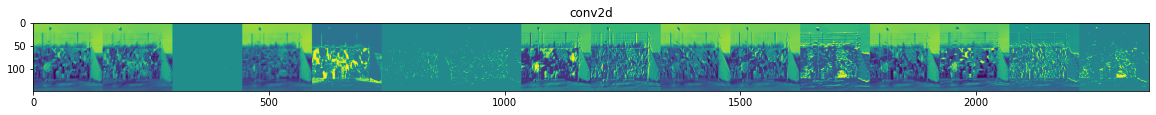

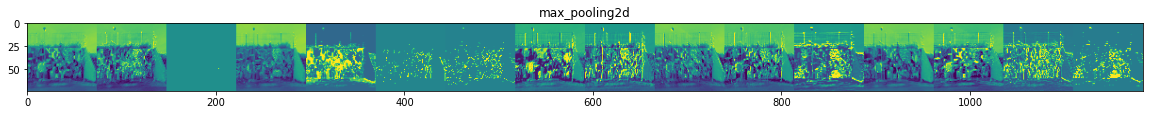

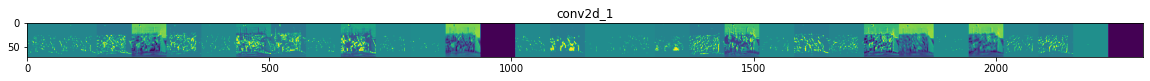

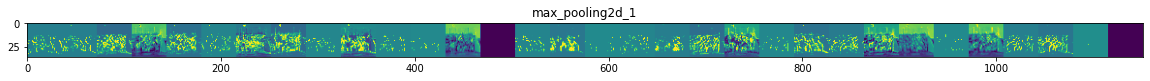

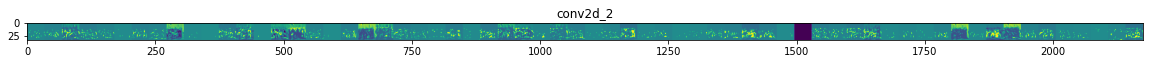

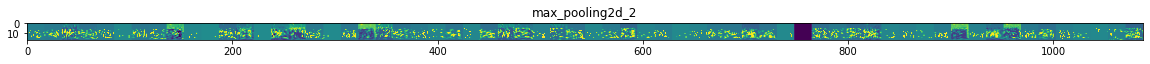

In [ ]:

successive_outputs = [layer.output for layer in model.layers[1:]]
visualization_model = Model(img_input, successive_outputs)

img_files = []

for artist in train.values():
    img_files += [os.path.join(artist['dir'], file) for file in artist['file_names']]

img_path = random.choice(img_files)

img = load_img(img_path, target_size=(150, 150))  # this is a PIL image
x = img_to_array(img)  # Numpy array with shape (150, 150, 3)
x = x.reshape((1,) + x.shape)  # Numpy array with shape (1, 150, 150, 3)
x /= 255

successive_feature_maps = visualization_model.predict(x)
layer_names = [layer.name for layer in model.layers[1:]]

for layer_name, feature_map in zip(layer_names, successive_feature_maps):
    if len(feature_map.shape) == 4:
        n_features = feature_map.shape[-1]  # number of features in feature map
        # The feature map has shape (1, size, size, n_features)
        size = feature_map.shape[1]
        display_grid = np.zeros((size, size * n_features))
        for i in range(n_features):
            x = feature_map[0, :, :, i]
            x -= x.mean()
            x /= x.std()
            x *= 64
            x += 128
            x = np.clip(x, 0, 255).astype('uint8')
            display_grid[:, i * size : (i + 1) * size] = x
        scale = 20. / n_features
        plt.figure(figsize=(scale * n_features, scale))
        plt.title(layer_name)
        plt.grid(False)
        plt.imshow(display_grid, aspect='auto', cmap='viridis')

Text(0.5, 1.0, 'Training and validation loss')

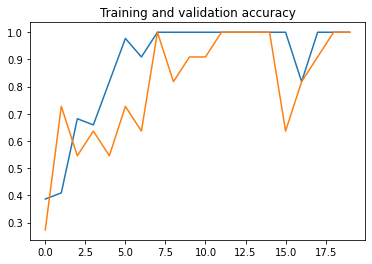

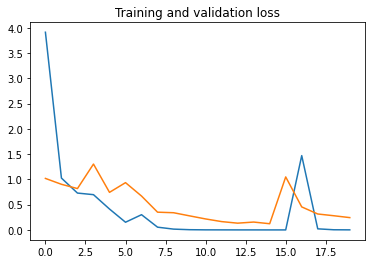

In [ ]:
# Retrieve a list of accuracy results on training and validation data
# sets for each training epoch
acc = history.history['acc']
val_acc = history.history['val_acc']

# Retrieve a list of list results on training data
# sets for each training epoch
loss = history.history['loss']
val_loss = history.history['val_loss']

# Get number of epochs
epochs = range(len(acc))

# Plot training accuracy per epoch
plt.plot(epochs, acc)
plt.plot(epochs, val_acc)
plt.title('Training and validation accuracy')

plt.figure()

# Plot training loss per epoch
plt.plot(epochs, loss)
plt.plot(epochs, val_loss)
plt.title('Training and validation loss')

In [ ]:
# with open(f'street_art_model.json', 'w') as json_file:
#     json_file.write(model.to_json())

# model.save_weights(f'street_art_weights.h5')